# Results of XVNLI

In [30]:
from evaluater import Evaluater
import pandas as pd

languages = ['ar', 'fr', 'es', 'ru']
# store accuracy for each language
accuracy_dict = {}

# for each language
for lang in languages:
    for shot in [0, 1, 5, 10, 20, 25, 48]:
        df = pd.read_csv(f"result/XVNLI/{lang}/prediction_{shot}_shot.csv", sep=",", header=0)
        predictions = df["prediction"].values
        evaluater = Evaluater("nli", lang)
        accuracy = evaluater.accuracy(predictions)
        accuracy_dict[f"{lang}_{shot}"] = accuracy

# print accuracy in table
print("lang", end="\t")
for shot in [0, 1, 5, 10, 20, 25, 48]:
    print(shot, end="\t")
print()
for lang in languages:
    print(lang, end="\t")
    for shot in [0, 1, 5, 10, 20, 25, 48]:
        print(f"{accuracy_dict[f'{lang}_{shot}']:.4f}", end="\t")
    print()

lang	0	1	5	10	20	25	48	
ar	0.5800	0.5661	0.5670	0.5852	0.6026	0.5922	0.6070	
fr	0.6322	0.6191	0.6139	0.6278	0.6461	0.6365	0.6461	
es	0.6104	0.5896	0.5913	0.5939	0.6261	0.6061	0.6261	
ru	0.6139	0.5957	0.6052	0.6191	0.6304	0.6339	0.6557	


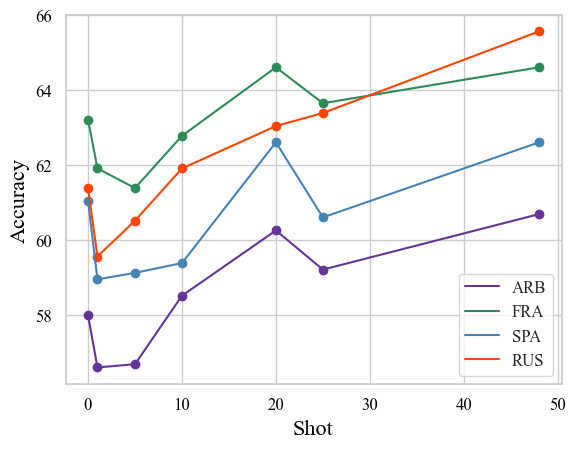

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "serif"  # Set the default font family
plt.rcParams["font.serif"] = ["Times New Roman"] 
sns.set_theme(style="whitegrid")

# set the lines color for each language
colors = ['rebeccapurple', 'seagreen', 'steelblue' , 'orangered']
sns.set_palette(sns.color_palette(colors))
alt_langs = ['ARB', 'FRA', 'SPA', 'RUS']
for lang in languages:
    x = [0, 1, 5, 10, 20, 25, 48]
    y = [accuracy_dict[f"{lang}_{shot}"]*100 for shot in x]
    plt.plot(x, y, label=alt_langs[languages.index(lang)])
    plt.scatter(x, y)
    


# Add legend for each line
plt.legend(loc="lower right", prop={'family': 'Times New Roman', 'size': 12})
# Customize the x-axis tick labels
plt.xticks(fontname="Times New Roman", fontsize=12, color='black')

# Customize the y-axis tick labels
plt.yticks(fontname="Times New Roman", fontsize=12, color='black')

plt.xlabel("Shot", fontname="Times New Roman", fontsize=16, color='black')
plt.ylabel("Accuracy", fontname="Times New Roman", fontsize=16, color='black')
plt.show()

# Results for MaRVL

In [1]:
from evaluater import Evaluater
import pandas as pd

# print all the frames used
template1 = "<{}> <{}>"
template2 = "Left: {}. Right: {}."
template3 = "Left: <{}>. Right: <{}>."
template4 = "There are {} in the left image and {} in the right image."
template5 = "The left image shows {} while the right image shows {}."

print("Frame0: {} {}")
print("Frame1:", template1)
print("Frame2:", template2)
print("Frame3:", template3)
print("Frame4:", template4)
print("Frame5:", template5)  



languages = ["id", "sw", "ta", "tr", "zh"]
# store accuracy for each language
accuracy_dict = {}

# for each language
for lang in languages:
    for frame in [0, 1, 2, 3, 4, 5]:
        df = pd.read_csv(f"result/MaRVL/{lang}/prediction_frame_{frame}.csv", sep=",", header=0)
        predictions = df["prediction"].values
        evaluater = Evaluater("nlr", lang)
        accuracy = evaluater.accuracy(predictions)
        accuracy_dict[f"{lang}_{frame}"] = accuracy

# print accuracy in table
print("lang", end="\t")
for frame in [0, 1, 2, 3, 4, 5]:
    print(frame, end="\t")
print()
for lang in languages:
    print(lang, end="\t")
    for frame in [0, 1, 2, 3, 4, 5]:
        print(f"{accuracy_dict[f'{lang}_{frame}']:.4f}", end="\t")
    print()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Frame0: {} {}
Frame1: <{}> <{}>
Frame2: Left: {}. Right: {}.
Frame3: Left: <{}>. Right: <{}>.
Frame4: There are {} in the left image and {} in the right image.
Frame5: The left image shows {} while the right image shows {}.
lang	0	1	2	3	4	5	
id	0.5691	0.5638	0.5647	0.5647	0.5603	0.5674	
sw	0.5514	0.5560	0.5478	0.5460	0.5424	0.5352	
ta	0.5692	0.5789	0.5709	0.5692	0.5612	0.5556	
tr	0.5771	0.5831	0.5831	0.5831	0.5678	0.5737	
zh	0.5464	0.5524	0.5573	0.5692	0.5534	0.5553	


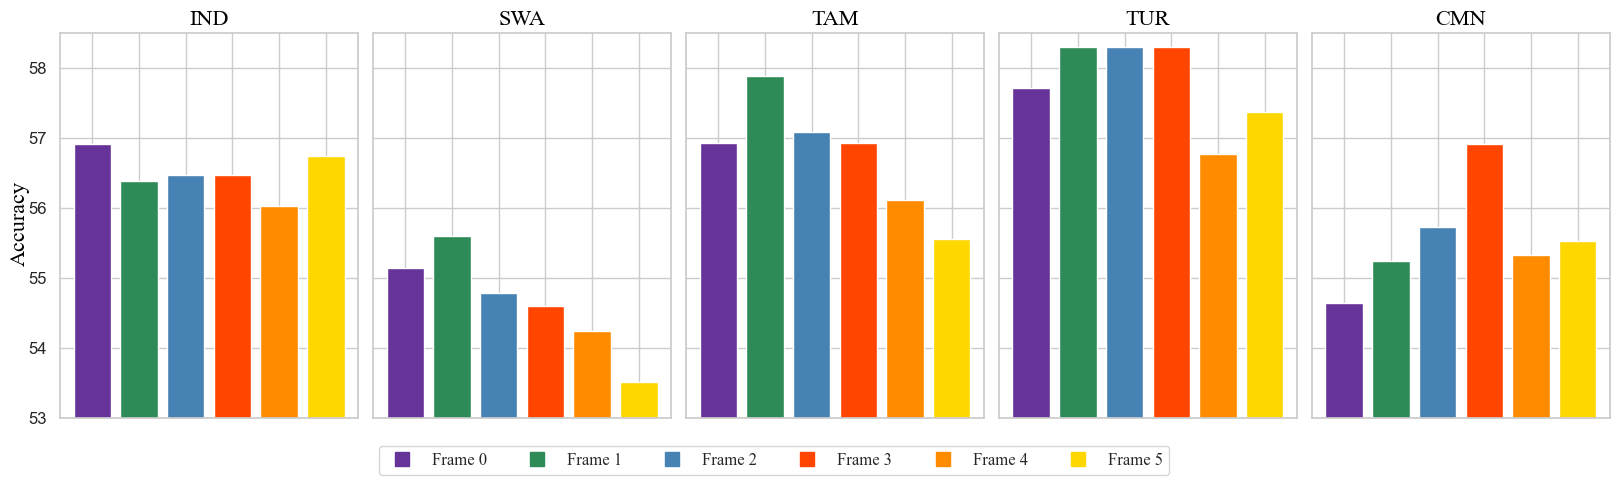

In [17]:
# draw one subplot for each languages, with a bar chart that have the frame as the x-axis, and acc as the y axis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme(style="whitegrid")
# set the bar color for each frame
colors = ['rebeccapurple', 'seagreen', 'steelblue' , 'orangered', 'darkorange', 'gold']

sns.set_palette(sns.color_palette(colors))
alt_langs = ['IND', 'SWA', 'TAM', 'TUR', 'CMN']
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# one subplot for each language
for language in languages:
    x = [0, 1, 2, 3, 4, 5]
    acc = [accuracy_dict[f"{language}_{frame}"]*100 for frame in x]
    # use a different color for each frame
    axs[languages.index(language)].bar(x, acc, color=colors)
    # set the title for each subplot
    axs[languages.index(language)].set_title(alt_langs[languages.index(language)], fontname="Times New Roman", fontsize=16, color='black')
    axs[languages.index(language)].set_xticklabels([])

    # set the x-axis label for each subplot
    axs[languages.index(language)].set_xticks(np.arange(0, 6, 1), minor=False)

    axs[languages.index(language)].set_ylim(53, 58.5)
    axs[languages.index(language)].set_yticks(np.arange(53, 59), minor=False)
    axs[languages.index(language)].set_yticklabels(np.arange(53, 59))
    
    axs[languages.index(language)].tick_params(axis='x', labelsize=12)
    axs[languages.index(language)].tick_params(axis='y', labelsize=12)

# set the y-axis label for the whole figure
fig.text(0.1, 0.5, 'Accuracy', va='center', rotation='vertical', fontname="Times New Roman", fontsize=16, color='black')

# add a legend for the whole figure, with the colors
patches = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=colors[i],
            label="Frame {}".format(i))[0]  for i in range(6)]
# put the legend on the lower center
plt.legend(handles=patches, bbox_to_anchor=(-0.45, -0.05), ncol=6, prop={'family': 'Times New Roman', 'size': 12})
plt.subplots_adjust(wspace=0.05)
plt.show()